***IMPORTING LIBRARIES***

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#DATA PREPROCESSING

##READING DATASET

In [22]:
dataset = pd.read_csv('data\crime_dataset_india.csv')
print(dataset.dtypes)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Report Number          int64
Date Reported         object
Date of Occurrence    object
Time of Occurrence    object
City                  object
Crime Code             int64
Crime Description     object
Victim Age             int64
Victim Gender         object
Weapon Used           object
Crime Domain          object
Police Deployed        int64
Case Closed           object
Date Case Closed      object
dtype: object


In [23]:
print(X)
print(y)

[[1 '02-01-2020 00:00' '01-01-2020 00:00' ... 'Violent Crime' 13 'No']
 [2 '01-01-2020 19:00' '01-01-2020 01:00' ... 'Other Crime' 9 'No']
 [3 '02-01-2020 05:00' '01-01-2020 02:00' ... 'Other Crime' 15 'No']
 ...
 [40158 '02-08-2024 03:00' '07-31-2024 05:00' ... 'Violent Crime' 6 'No']
 [40159 '01-08-2024 19:00' '07-31-2024 06:00' ... 'Violent Crime' 1 'No']
 [40160 '31-07-2024 17:00' '07-31-2024 07:00' ... 'Violent Crime' 7 'Yes']]
[nan nan nan ... nan nan '28-09-2024 17:00']


##MANAGING MISSING DATA - REPLACING MISSING ENTRIES WITH MEAN

In [24]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np

dataset = pd.read_csv('data/crime_dataset_india.csv')

# Select numeric columns only for imputation
numeric_cols = dataset.select_dtypes(include=[np.number]).columns

imputer = SimpleImputer(strategy='mean')
dataset[numeric_cols] = imputer.fit_transform(dataset[numeric_cols])

# Now separate features and target as numpy arrays
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [25]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Assuming X is a numpy array with first column as date strings
# Convert it back to DataFrame to handle date/time easily
column_names = ['date'] + [f'feature_{i}' for i in range(1, X.shape[1])]
df = pd.DataFrame(X, columns=column_names)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract date features (year, month, day)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Drop original date column
df = df.drop(columns=['date'])

# Now apply OneHotEncoder on the new 'year', 'month', 'day' or other categorical columns
transformer = make_column_transformer(
    (OneHotEncoder(), ['year', 'month', 'day']),
    remainder='passthrough'
)

transformed = transformer.fit_transform(df)
print(transformed)


[[1.0 1.0 1.0 ... 'Violent Crime' 13.0 'No']
 [1.0 1.0 1.0 ... 'Other Crime' 9.0 'No']
 [1.0 1.0 1.0 ... 'Other Crime' 15.0 'No']
 ...
 [1.0 1.0 1.0 ... 'Violent Crime' 6.0 'No']
 [1.0 1.0 1.0 ... 'Violent Crime' 1.0 'No']
 [1.0 1.0 1.0 ... 'Violent Crime' 7.0 'Yes']]


In [26]:
print(X)
print(X.shape)

[[1.0 '02-01-2020 00:00' '01-01-2020 00:00' ... 'Violent Crime' 13.0 'No']
 [2.0 '01-01-2020 19:00' '01-01-2020 01:00' ... 'Other Crime' 9.0 'No']
 [3.0 '02-01-2020 05:00' '01-01-2020 02:00' ... 'Other Crime' 15.0 'No']
 ...
 [40158.0 '02-08-2024 03:00' '07-31-2024 05:00' ... 'Violent Crime' 6.0
  'No']
 [40159.0 '01-08-2024 19:00' '07-31-2024 06:00' ... 'Violent Crime' 1.0
  'No']
 [40160.0 '31-07-2024 17:00' '07-31-2024 07:00' ... 'Violent Crime' 7.0
  'Yes']]
(40160, 13)


In [27]:
np.shape(X)


(40160, 13)

***SAVING DATASET TO A FILE AND DOWNLOADING IT TO VERIFY ONE HOT ENCODING***

In [28]:
DF = pd.DataFrame(X)
DF.to_csv("ds (1).csv")
print(X[0][0])

1.0


## CLUSTERING TO FIND OPTIMAL NUMBER OF CLUSTERS

In [29]:
y = np.array(y)
Z = y
U = (X[:, 37:])
A = X[:, 36:]
print(X[:, 36:])

[]


In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), ['year', 'month', 'day']),  # one-hot encode these date parts
    remainder='passthrough'  # pass numeric features as-is
)

transformed = transformer.fit_transform(df)

# Convert to dense if sparse matrix
if hasattr(transformed, "toarray"):
    transformed = transformed.toarray()

print(transformed.shape)
print(transformed)


(40160, 15)
[[1.0 1.0 1.0 ... 'Violent Crime' 13.0 'No']
 [1.0 1.0 1.0 ... 'Other Crime' 9.0 'No']
 [1.0 1.0 1.0 ... 'Other Crime' 15.0 'No']
 ...
 [1.0 1.0 1.0 ... 'Violent Crime' 6.0 'No']
 [1.0 1.0 1.0 ... 'Violent Crime' 1.0 'No']
 [1.0 1.0 1.0 ... 'Violent Crime' 7.0 'Yes']]


In [31]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Load data
df = pd.read_csv('data/crime_dataset_india.csv')

# Columns with datetime strings
date_cols = ['Date Reported', 'Date of Occurrence', 'Time of Occurrence', 'Date Case Closed']

# Convert to datetime with dayfirst=True to match dd-mm-yyyy format
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)

# Extract useful datetime features
for col in date_cols:
    df[f'{col}_year'] = df[col].dt.year
    df[f'{col}_month'] = df[col].dt.month
    df[f'{col}_day'] = df[col].dt.day
    df[f'{col}_hour'] = df[col].dt.hour

# Drop original datetime columns
df.drop(columns=date_cols, inplace=True)

# Define categorical and numerical columns based on your dataset
categorical_cols = ['City', 'Crime Code', 'Crime Description', 'Victim Gender', 'Weapon Used', 'Crime Domain', 'Case Closed', 'Police Deployed']
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Apply preprocessing
X_processed = preprocessor.fit_transform(df)

# Convert sparse matrix to dense if needed
if hasattr(X_processed, 'toarray'):
    X_processed = X_processed.toarray()

# K-Means clustering with 2 clusters (change as needed)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_processed)

print("Cluster assignments:\n", clusters)


Cluster assignments:
 [0 0 0 ... 1 1 1]


In [32]:
print(df.head())
print(df.columns)


   Report Number       City  Crime Code Crime Description  Victim Age  \
0              1  Ahmedabad         576    IDENTITY THEFT          16   
1              2    Chennai         128          HOMICIDE          37   
2              3   Ludhiana         271        KIDNAPPING          48   
3              4       Pune         170          BURGLARY          49   
4              5       Pune         421         VANDALISM          30   

  Victim Gender   Weapon Used   Crime Domain  Police Deployed Case Closed  \
0             M  Blunt Object  Violent Crime               13          No   
1             M        Poison    Other Crime                9          No   
2             F  Blunt Object    Other Crime               15          No   
3             F       Firearm    Other Crime                1         Yes   
4             F         Other    Other Crime               18         Yes   

   ...  Date of Occurrence_day  Date of Occurrence_hour  \
0  ...                     1.0         

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(clusters)  # use 'clusters' instead of 'y_kmeans'
print(y)


[0 0 0 ... 1 1 1]


## SPLITTING DATA

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [35]:
print(X_train)
print(X_train.shape)

[[15169.0 '25-09-2021 12:00' '09-24-2021 00:00' ... 'Other Crime' 17.0
  'Yes']
 [39953.0 '24-07-2024 10:00' '07-22-2024 16:00' ... 'Other Crime' 19.0
  'Yes']
 [27416.0 '16-02-2023 17:00' '02-16-2023 07:00' ... 'Fire Accident' 1.0
  'Yes']
 ...
 [5193.0 '04-08-2020 14:00' '08-04-2020 08:00' ... 'Traffic Fatality' 9.0
  'No']
 [12173.0 '24-05-2021 01:00' '05-22-2021 04:00' ... 'Other Crime' 2.0
  'Yes']
 [33004.0 '08-10-2023 01:00' '10-07-2023 03:00' ... 'Other Crime' 14.0
  'No']]
(32128, 13)


In [36]:
print(X_test)

[[24463.0 '16-10-2022 07:00' '10-16-2022 06:00' ... 'Other Crime' 17.0
  'No']
 [560.0 '27-01-2020 01:00' '01-24-2020 07:00' ... 'Other Crime' 5.0 'No']
 [30507.0 '25-06-2023 04:00' '06-25-2023 02:00' ... 'Other Crime' 14.0
  'Yes']
 ...
 [20472.0 '03-05-2022 02:00' '05-02-2022 23:00' ... 'Other Crime' 8.0
  'Yes']
 [11471.0 '24-04-2021 16:00' '04-22-2021 22:00' ... 'Other Crime' 5.0
  'No']
 [10635.0 '20-03-2021 07:00' '03-19-2021 02:00' ... 'Other Crime' 6.0
  'Yes']]


In [37]:
print(y_train)

[0 1 1 ... 0 0 1]


In [38]:
print(y_test)

[1 0 1 ... 1 0 0]


In [39]:
print(X)

[[1.0 '02-01-2020 00:00' '01-01-2020 00:00' ... 'Violent Crime' 13.0 'No']
 [2.0 '01-01-2020 19:00' '01-01-2020 01:00' ... 'Other Crime' 9.0 'No']
 [3.0 '02-01-2020 05:00' '01-01-2020 02:00' ... 'Other Crime' 15.0 'No']
 ...
 [40158.0 '02-08-2024 03:00' '07-31-2024 05:00' ... 'Violent Crime' 6.0
  'No']
 [40159.0 '01-08-2024 19:00' '07-31-2024 06:00' ... 'Violent Crime' 1.0
  'No']
 [40160.0 '31-07-2024 17:00' '07-31-2024 07:00' ... 'Violent Crime' 7.0
  'Yes']]


#FEATURE SCALING

In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('data/crime_dataset_india.csv')

# Step 1: Convert datetime columns to datetime dtype and extract numeric parts
datetime_cols = ['Date Reported', 'Date of Occurrence', 'Date Case Closed']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)  # set dayfirst=True if format is DD-MM-YYYY

# Extract year, month, day as separate features
df['Reported_year'] = df['Date Reported'].dt.year
df['Reported_month'] = df['Date Reported'].dt.month
df['Reported_day'] = df['Date Reported'].dt.day

df['Occurrence_year'] = df['Date of Occurrence'].dt.year
df['Occurrence_month'] = df['Date of Occurrence'].dt.month
df['Occurrence_day'] = df['Date of Occurrence'].dt.day

df['CaseClosed_year'] = df['Date Case Closed'].dt.year
df['CaseClosed_month'] = df['Date Case Closed'].dt.month
df['CaseClosed_day'] = df['Date Case Closed'].dt.day

# Convert 'Time of Occurrence' to hour integer (numeric)
df['Time of Occurrence'] = pd.to_datetime(df['Time of Occurrence'], errors='coerce').dt.hour

# Step 2: Encode categorical columns
cat_cols = ['City', 'Crime Description', 'Victim Gender', 'Weapon Used', 'Crime Domain', 'Police Deployed', 'Case Closed']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Step 3: Prepare the feature matrix X with numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_cols].values

# Step 4: Train-test split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Step 5: Apply feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Now X_train and X_test are scaled and ready for ML models
print("Feature scaling completed. Sample scaled features:")
print(X_train[:5])


Feature scaling completed. Sample scaled features:
[[ 0.11587482 -0.35782093  0.21407177 -0.1705188   0.12932111  1.59318888
  -0.05297839 -0.03334304  0.18006304 -1.68404834]
 [ 1.62486121 -0.79163335  1.2550694   0.3234605   1.62809218  0.43541506
  -0.05297839  2.1251376  -1.61139239 -0.31947665]
 [ 0.38072297         nan  1.66452847  1.55840877         nan         nan
          nan -0.03334304  1.37436666  1.38623795]
 [ 0.92942958 -0.50242507 -1.34048469  0.9656336   0.87870665  0.72485852
   0.24067124  0.68615051  0.47863894 -1.45661973]
 [ 1.36243255 -1.51465403 -0.68118619  1.21262325  1.62809218 -1.01180222
  -1.2275769   1.40564406 -0.71566468 -1.0017625 ]]


In [41]:
print(X_train.shape)


(32128, 10)


In [42]:
print(X_train)

[[ 0.11587482 -0.35782093  0.21407177 ... -0.03334304  0.18006304
  -1.68404834]
 [ 1.62486121 -0.79163335  1.2550694  ...  2.1251376  -1.61139239
  -0.31947665]
 [ 0.38072297         nan  1.66452847 ... -0.03334304  1.37436666
   1.38623795]
 ...
 [ 1.56109027 -0.35782093 -0.57708643 ...  2.84463115 -1.61139239
   1.72738088]
 [-1.6618482  -0.64702921  1.5187888  ... -1.47233013 -1.31281649
  -0.09204804]
 [-0.37130753         nan  1.10238975 ...         nan         nan
          nan]]


In [43]:
print(X_test)

[[-0.7829671  -1.22544576 -0.33418698 ... -0.75283659 -0.11851287
  -1.57033403]
 [-0.82833261         nan  1.59512863 ...         nan         nan
          nan]
 [ 1.4090078          nan -0.29948706 ...         nan         nan
          nan]
 ...
 [-1.15721093  1.37742871 -1.47234439 ... -0.75283659  0.18006304
   0.81766642]
 [ 0.35583675 -1.65925817  0.3320515  ...         nan         nan
          nan]
 [-1.63920865         nan -0.22314723 ...         nan         nan
          nan]]


#ANALYSIS OF CRIME RATE

In [44]:
dataset.describe()

,Report Number,Crime Code,Victim Age,Police Deployed
count,40160.000000,40160.000000,40160.00000,40160.000000
mean,20080.500000,349.360259,44.49126,10.006250
std,11593.337742,144.169205,20.22555,5.467951
min,1.000000,100.000000,10.00000,1.000000
25%,10040.750000,225.000000,27.00000,5.000000
50%,20080.500000,349.000000,44.00000,10.000000
75%,30120.250000,474.000000,62.00000,15.000000
max,40160.000000,599.000000,79.00000,19.000000


## SATE VS TOTAL CRIME OVER 10 YEARS

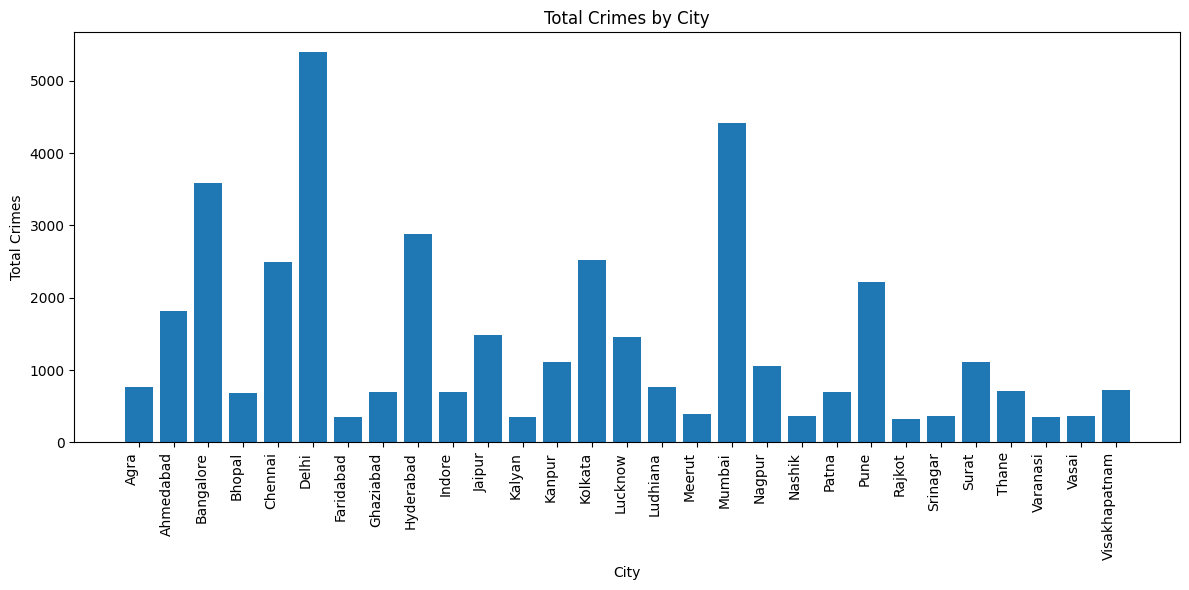

In [45]:
import matplotlib.pyplot as plt

# Group by City and count number of crimes (rows)
df_sum_by_city = dataset.groupby('City').size().reset_index(name='Total Crimes')

# Plot
plt.figure(figsize=(12,6))
plt.bar(df_sum_by_city['City'], df_sum_by_city['Total Crimes'])
plt.xticks(rotation=90, ha='right')
plt.title('Total Crimes by City')
plt.xlabel('City')
plt.ylabel('Total Crimes')
plt.tight_layout()
plt.show()


## TYPE OF CRIME V/S RATE OF THAT CRIME

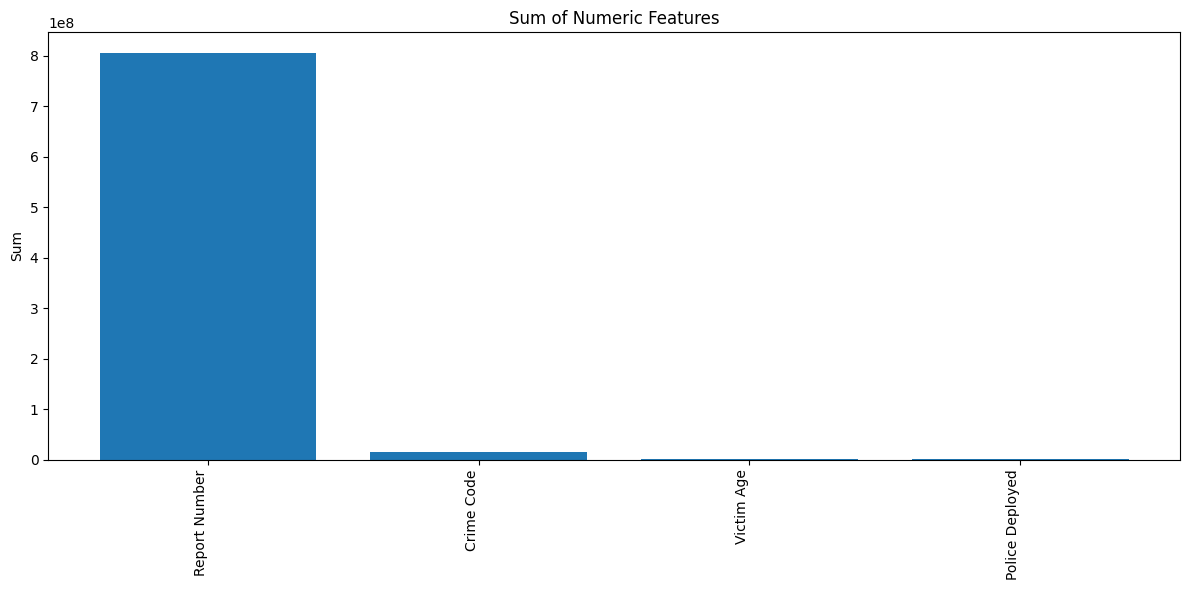

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = dataset.select_dtypes(include=[np.number]).columns

# Sum values of numeric columns
sum_col = dataset[numeric_cols].sum()

# Convert sums to numpy array for plotting
f = np.array(sum_col)

# Column names for plotting
crimes = sum_col.index.values

# Plot bar chart
fig, ax = plt.subplots(figsize=(12,6))
plt.xticks(rotation=90, ha='right')
ax.bar(crimes, f)

plt.title("Sum of Numeric Features")
plt.ylabel("Sum")
plt.tight_layout()
plt.show()


##PIE CHART OF CRIME RATE PER STATE

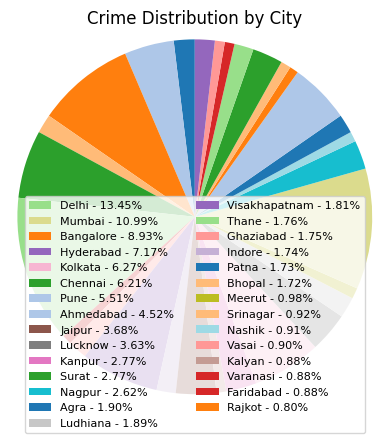

In [47]:
import matplotlib.pyplot as plt

# Count crimes per city by counting occurrences of 'Crime Code' grouped by 'City'
df_sum_by_city = dataset.groupby('City')['Crime Code'].count().reset_index()

# Rename columns for clarity
df_sum_by_city.columns = ['City', 'Crime Count']

# Plot pie chart
states = df_sum_by_city['City']
counts = df_sum_by_city['Crime Count']

colors = plt.cm.tab20.colors  # Use a colormap with enough colors

# Calculate percentage for labels
percentages = 100 * counts / counts.sum()

patches, texts = plt.pie(counts, colors=colors[:len(counts)], startangle=90, radius=1.2)
labels = [f"{city} - {percent:.2f}%" for city, percent in zip(states, percentages)]

# Sort legend by counts descending
patches, labels, _ = zip(*sorted(zip(patches, labels, counts), key=lambda x: x[2], reverse=True))

plt.legend(patches, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), fontsize=8, ncol=2)
plt.title('Crime Distribution by City')

plt.show()


APPLYING MODELS STARTS :-

# Building the ANN

## Initializing the ANN

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming 'dataset' is your loaded DataFrame

# Step 1: Select features and target
feature_columns = ['Victim Age', 'Crime Code', 'Victim Gender', 'Weapon Used', 'Crime Domain', 'Police Deployed']
target_column = 'Case Closed'

X = dataset[feature_columns]
y = dataset[target_column]

# Step 2: Handle categorical variables by one-hot encoding
X = pd.get_dummies(X)

# Step 3: Convert target to binary numeric
# Adjust these mappings based on your actual data values
y = y.map({'Yes': 1, 'No': 0})

# Step 4: Handle missing values if any (simple example: drop)
X = X.dropna()
y = y.loc[X.index]

# Step 5: Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

# Step 6: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Build the ANN
input_dim = X_train.shape[1]

ann = Sequential()
ann.add(Dense(units=6, activation='relu', input_shape=(input_dim,)))
ann.add(Dense(units=6, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 8: Train the ANN
ann.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
1004/1004 [==============================] - 2s 1ms/step - loss: 0.6997 - accuracy: 0.5048 - val_loss: 0.6945 - val_accuracy: 0.5037
Epoch 2/50
1004/1004 [==============================] - 1s 1ms/step - loss: 0.6936 - accuracy: 0.5032 - val_loss: 0.6942 - val_accuracy: 0.4943
Epoch 3/50
1004/1004 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.5090 - val_loss: 0.6937 - val_accuracy: 0.5034
Epoch 4/50
1004/1004 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.5058 - val_loss: 0.6941 - val_accuracy: 0.4956
Epoch 5/50
1004/1004 [==============================] - 1s 1ms/step - loss: 0.6929 - accuracy: 0.5109 - val_loss: 0.6938 - val_accuracy: 0.4988
Epoch 6/50
1004/1004 [==============================] - 1s 1ms/step - loss: 0.6928 - accuracy: 0.5139 - val_loss: 0.6945 - val_accuracy: 0.4976
Epoch 7/50
1004/1004 [==============================] - 1s 1ms/step - loss: 0.6927 - accuracy: 0.5115 - val_loss: 0.6937 - val_accuracy:

### Training the ANN on the Training set

In [74]:
import numpy as np
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
result = ann.fit(X_train, y_train, batch_size = 32, epochs = 50)
loss = result.history['loss']
accuracy = result.history['accuracy']

print("Final Loss:", loss[-1])
print("Final Accuracy:", accuracy[-1])

Epoch 1/50
1004/1004 [==============================] - 1s 1ms/step - loss: 0.6906 - accuracy: 0.5283
Epoch 2/50
1004/1004 [==============================] - 1s 1ms/step - loss: 0.6906 - accuracy: 0.5291
Epoch 3/50
1004/1004 [==============================] - 1s 1ms/step - loss: 0.6906 - accuracy: 0.5313
Epoch 4/50
1004/1004 [==============================] - 1s 931us/step - loss: 0.6905 - accuracy: 0.5283
Epoch 5/50
1004/1004 [==============================] - 1s 985us/step - loss: 0.6907 - accuracy: 0.5311
Epoch 6/50
1004/1004 [==============================] - 1s 933us/step - loss: 0.6906 - accuracy: 0.5277
Epoch 7/50
1004/1004 [==============================] - 1s 898us/step - loss: 0.6905 - accuracy: 0.5267
Epoch 8/50
1004/1004 [==============================] - 1s 949us/step - loss: 0.6907 - accuracy: 0.5283
Epoch 9/50
1004/1004 [==============================] - 1s 939us/step - loss: 0.6905 - accuracy: 0.5289
Epoch 10/50
1004/1004 [==============================] - 1s 914us/step

Epoch 1/50
1004/1004 [==============================] - 1s 1ms/step - loss: 0.6905 - accuracy: 0.5289
Epoch 2/50
1004/1004 [==============================] - 1s 1ms/step - loss: 0.6905 - accuracy: 0.5293
Epoch 3/50
1004/1004 [==============================] - 1s 1ms/step - loss: 0.6905 - accuracy: 0.5284
Epoch 4/50
1004/1004 [==============================] - 1s 1ms/step - loss: 0.6904 - accuracy: 0.5294
Epoch 5/50
1004/1004 [==============================] - 1s 1ms/step - loss: 0.6907 - accuracy: 0.5290
Epoch 6/50
1004/1004 [==============================] - 1s 926us/step - loss: 0.6905 - accuracy: 0.5301
Epoch 7/50
1004/1004 [==============================] - 1s 925us/step - loss: 0.6905 - accuracy: 0.5282
Epoch 8/50
1004/1004 [==============================] - 1s 899us/step - loss: 0.6905 - accuracy: 0.5281
Epoch 9/50
1004/1004 [==============================] - 1s 964us/step - loss: 0.6906 - accuracy: 0.5280
Epoch 10/50
1004/1004 [==============================] - 1s 1ms/step - los

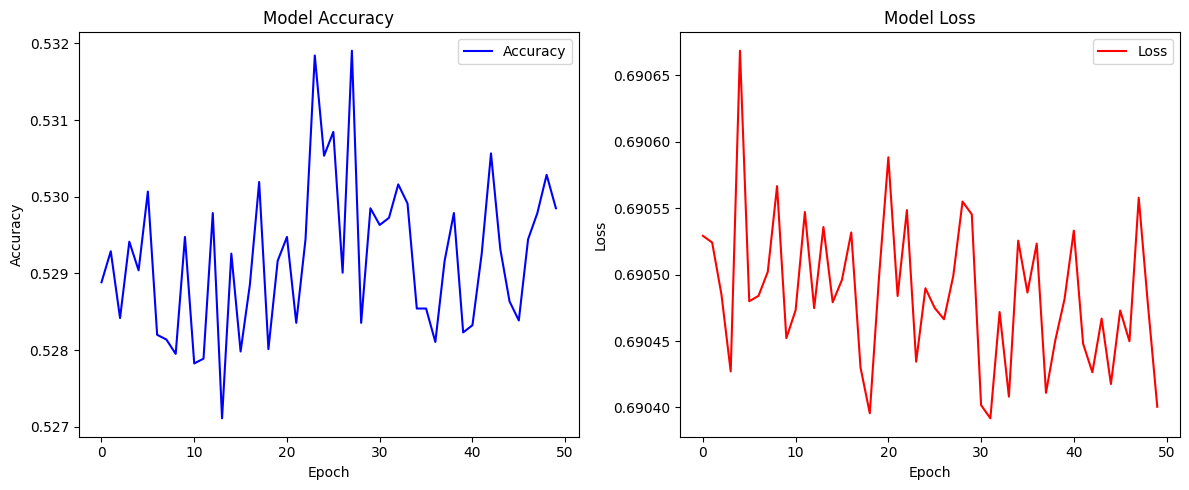

In [75]:
import matplotlib.pyplot as plt

# Train the model and save the training history
history = ann.fit(X_train, y_train, batch_size=32, epochs=50)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy', color='blue')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss', color='red')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = dataset.select_dtypes(include=[np.number]).columns

# Sum values of numeric columns
sum_col = dataset[numeric_cols].sum()

# Convert sums to numpy array for plotting
f = np.array(sum_col)

# Column names for plotting
crimes = sum_col.index.values

# Plot bar chart
fig, ax = plt.subplots(figsize=(12,6))
plt.xticks(rotation=90, ha='right')
ax.bar(crimes, f)

In [50]:
X_test = np.asarray(X_test).astype('float32')
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

251/251 [==============================] - 0s 714us/step
[[1 1]
 [1 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 0]]


In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2395 1651]
 [2323 1663]]


0.5052290836653387

In [52]:
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train)
print(y_train)

[[-0.1705188   0.21407177 -0.9192243  ...  0.8655223  -0.22299957
  -0.63103646]
 [ 0.3234605   1.2550694  -1.1020246  ... -1.1553717  -0.22299957
   1.5846945 ]
 [ 1.5584087   1.6645285  -0.00522319 ...  0.8655223  -0.22299957
  -0.63103646]
 ...
 [-0.12112087 -0.57708645  1.6399789  ... -1.1553717  -0.22299957
   1.5846945 ]
 [ 0.02707292  1.5187888  -0.9192243  ... -1.1553717  -0.22299957
   1.5846945 ]
 [ 1.2620212   1.1023897   0.7259777  ...  0.8655223  -0.22299957
  -0.63103646]]
[1. 1. 1. ... 1. 1. 0.]


# **Kernel SVM model**

In [53]:

# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)


SVC(random_state=0)

In [54]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 1.]
 [0. 0.]
 [0. 0.]]


In [55]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1986 2060]
 [2035 1951]]


0.49016434262948205

### **SVM model**

In [56]:

# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[0. 1.]
 [0. 0.]
 [0. 0.]
 ...
 [1. 1.]
 [0. 0.]
 [0. 0.]]
[[2283 1763]
 [2336 1650]]


0.48966633466135456

# K-NN model

In [57]:

# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0. 1.]
 [1. 0.]
 [0. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]
[[1983 2063]
 [1964 2022]]


0.4986304780876494

# Logistic Regression

In [58]:

# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0. 1.]
 [0. 0.]
 [0. 0.]
 ...
 [1. 1.]
 [1. 0.]
 [0. 0.]]
[[2014 2032]
 [2106 1880]]


0.48481075697211157

# Random Forest Regression

In [59]:
# Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0. 1.]
 [0. 0.]
 [0. 0.]
 ...
 [1. 1.]
 [1. 0.]
 [0. 0.]]
[[2014 2032]
 [2106 1880]]


0.48481075697211157

# Decision Tree Regression

In [60]:

# Training the Decision Tree Regression model on the whole dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)




# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))





# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0. 1.]
 [0. 0.]
 [0. 0.]
 ...
 [1. 1.]
 [1. 0.]
 [0. 0.]]
[[2014 2032]
 [2106 1880]]


0.48481075697211157

# SVR model

In [61]:

# Training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)


SVR()

In [62]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[0. 1.]
 [0. 0.]
 [0. 0.]
 ...
 [1. 1.]
 [1. 0.]
 [0. 0.]]
[[2014 2032]
 [2106 1880]]


0.48481075697211157

#RESULTS

## CLASSIFYING STATES AS SAFE/UNSAFE

STATE WITH HIGHER BARS ARE UNSAFE

Ahmedabad  : 



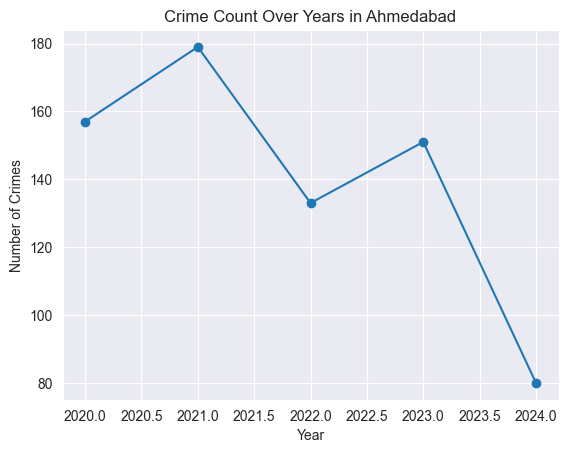



Chennai  : 



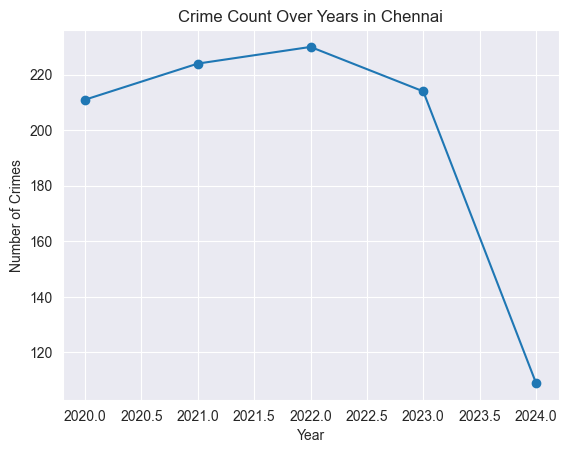



Ludhiana  : 



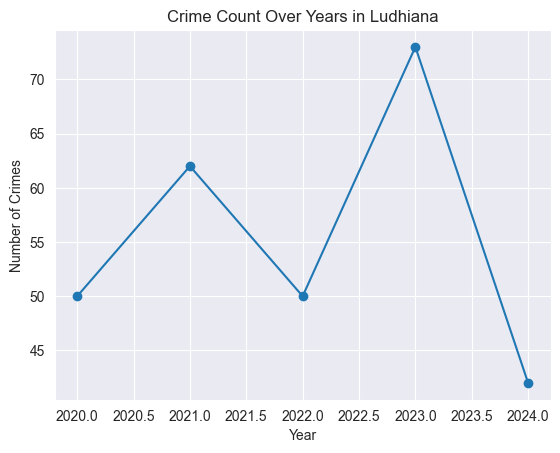



Pune  : 



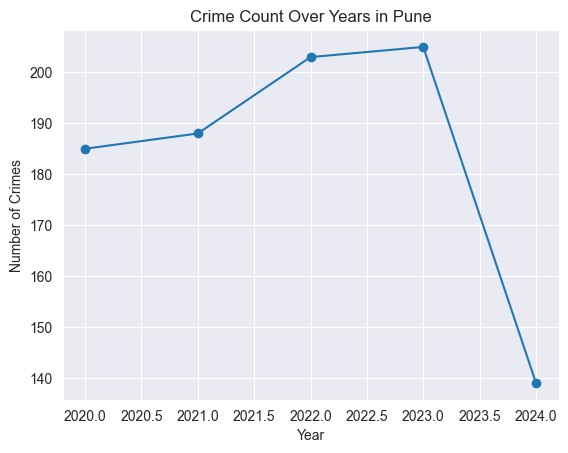



Delhi  : 



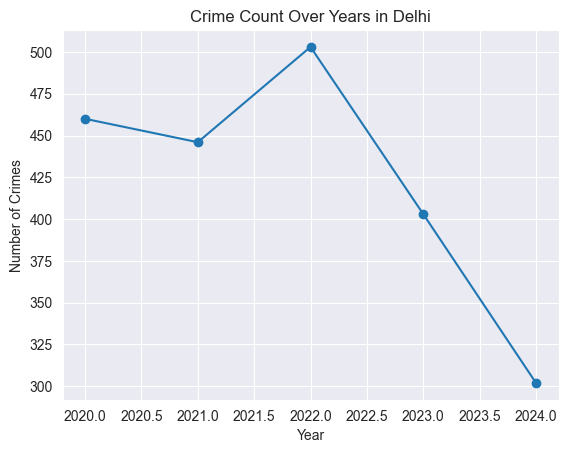



Mumbai  : 



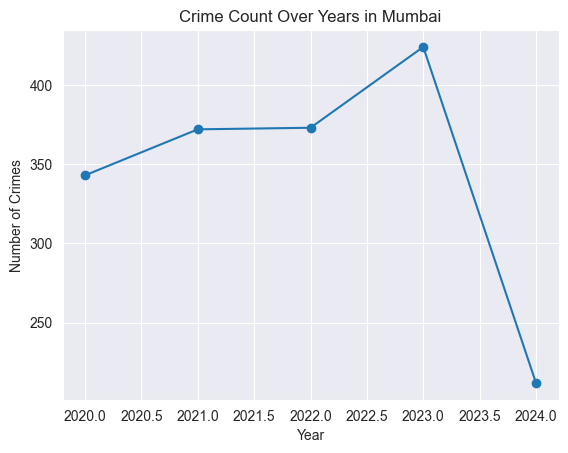



Surat  : 



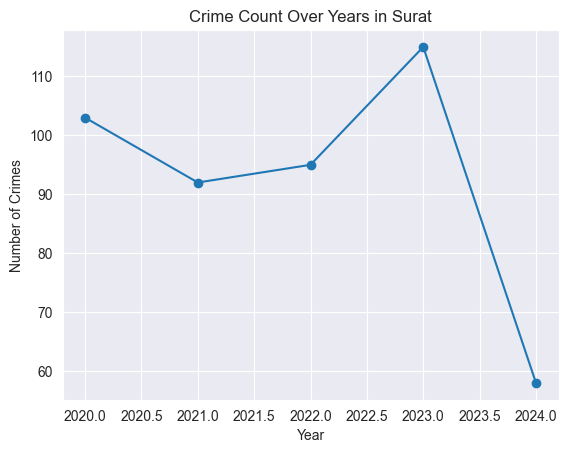



Visakhapatnam  : 



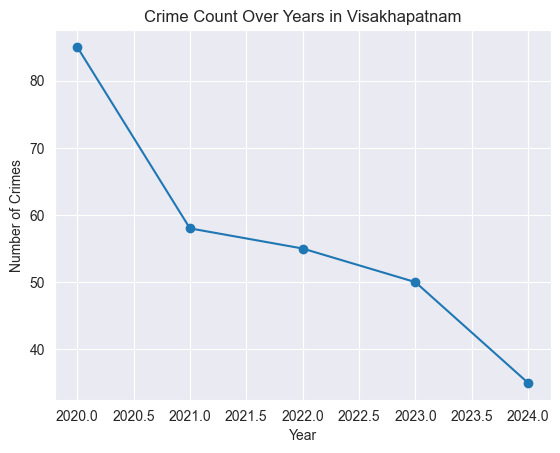



Bangalore  : 



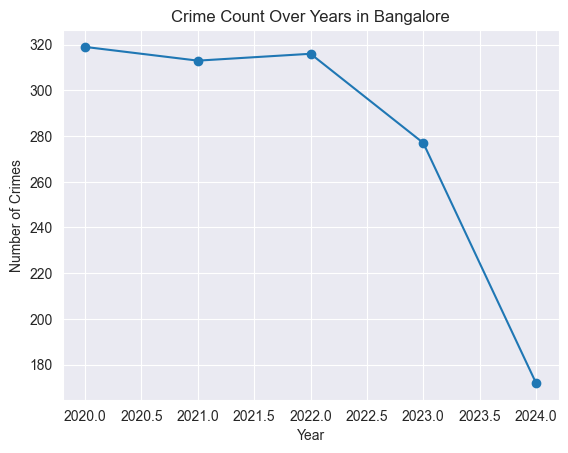



Kolkata  : 



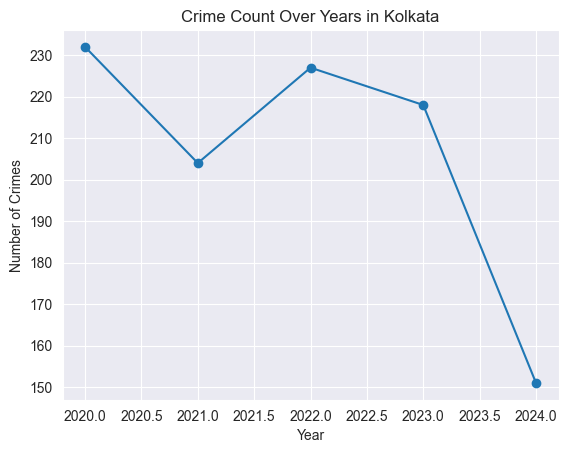



Ghaziabad  : 



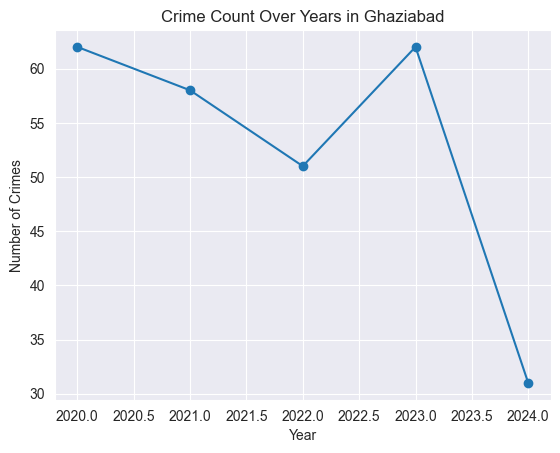



Hyderabad  : 



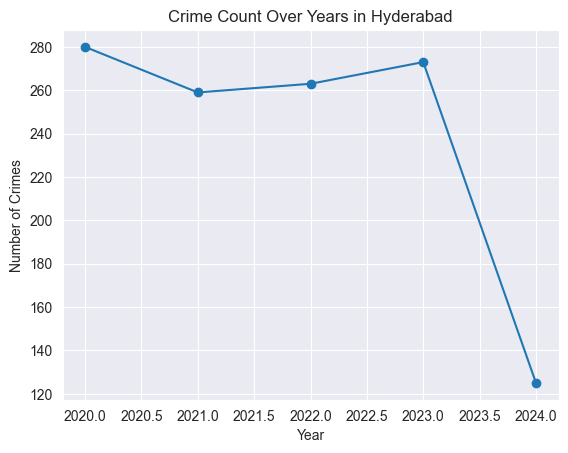



Jaipur  : 



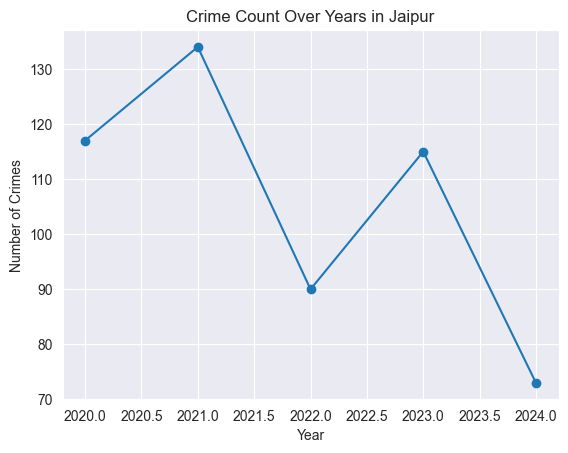



Lucknow  : 



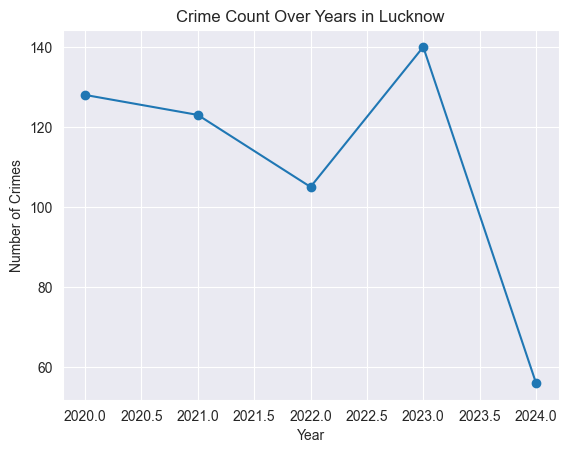



Bhopal  : 



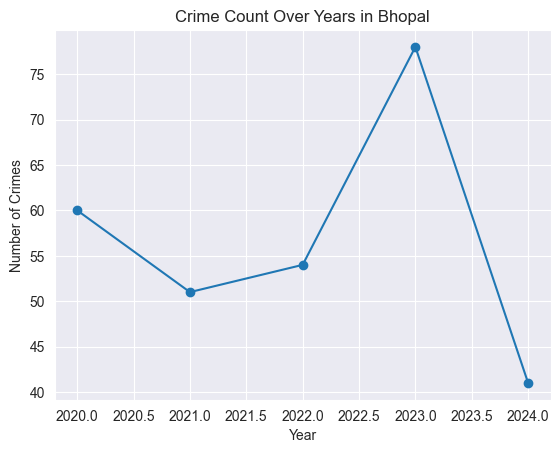



Patna  : 



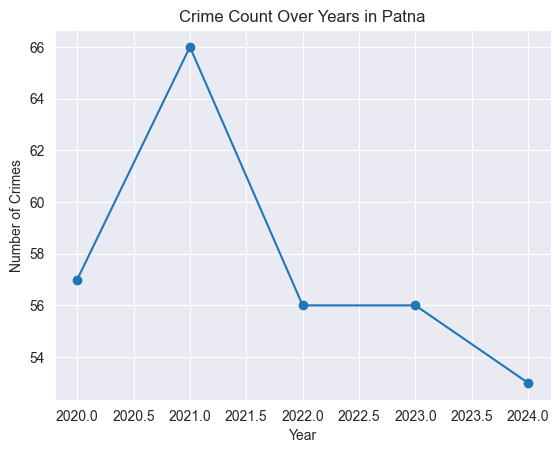



Kanpur  : 



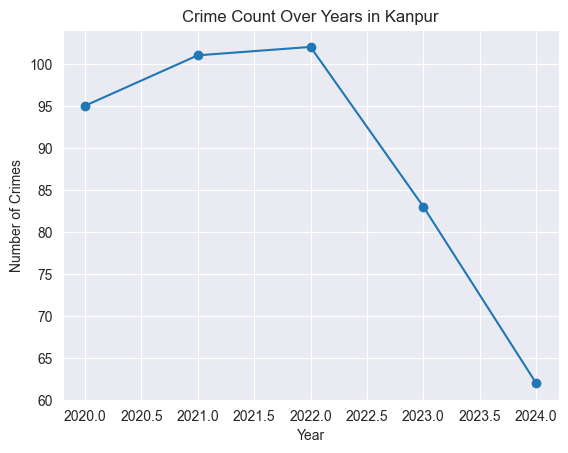



Varanasi  : 



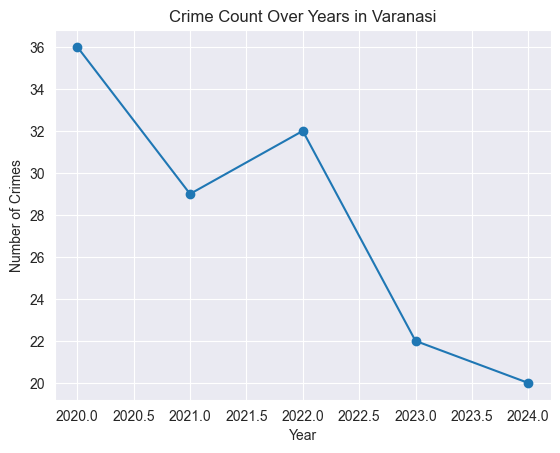



Nagpur  : 



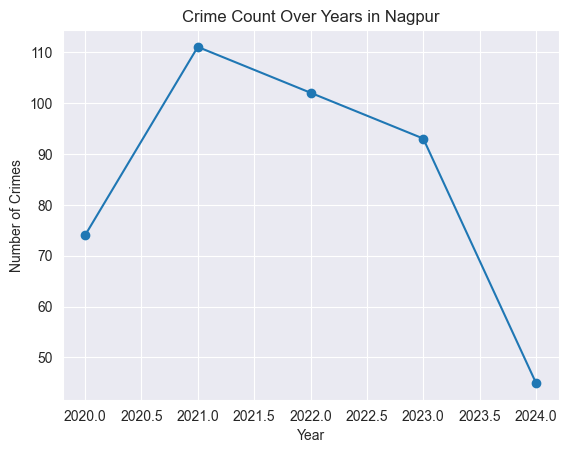



Meerut  : 



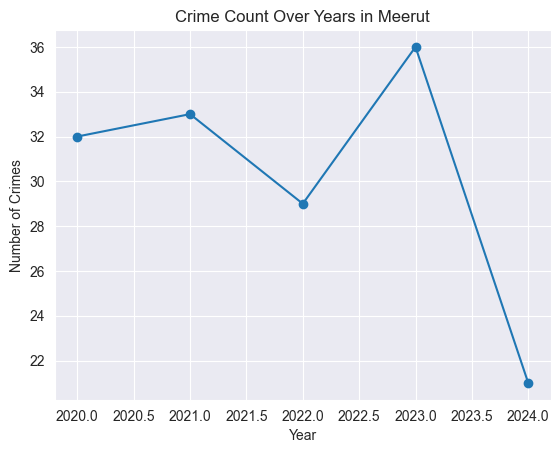



Thane  : 



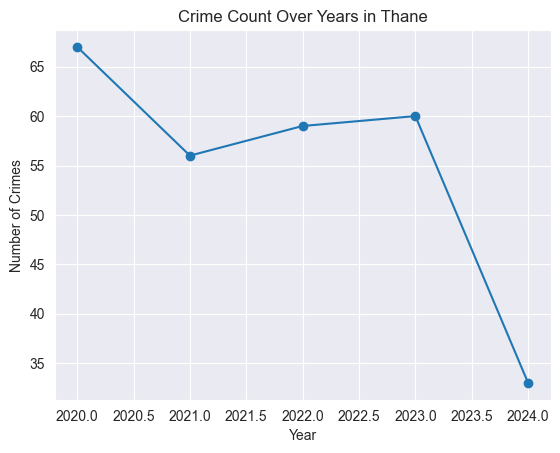



Indore  : 



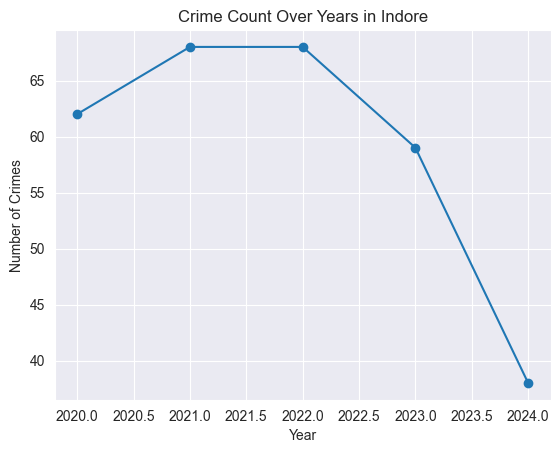



Rajkot  : 



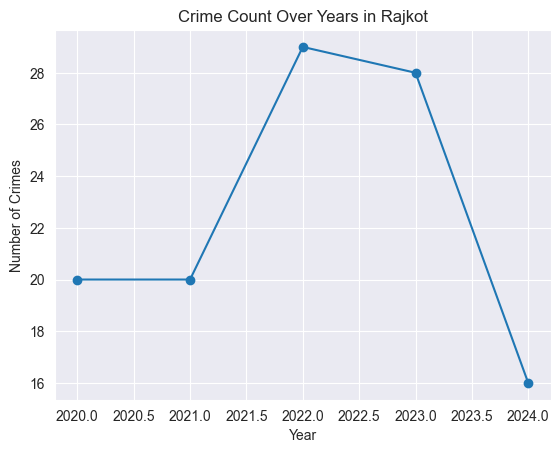



Vasai  : 



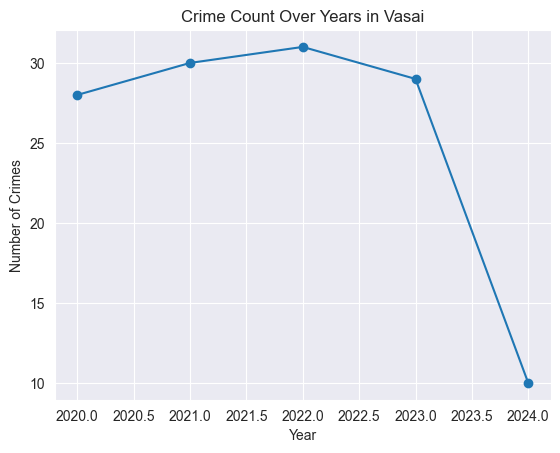



Agra  : 



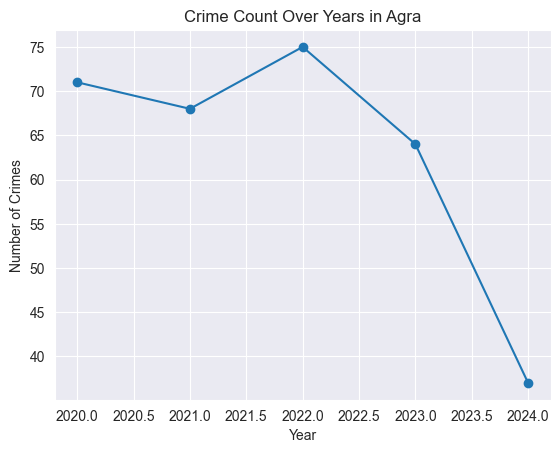



Kalyan  : 



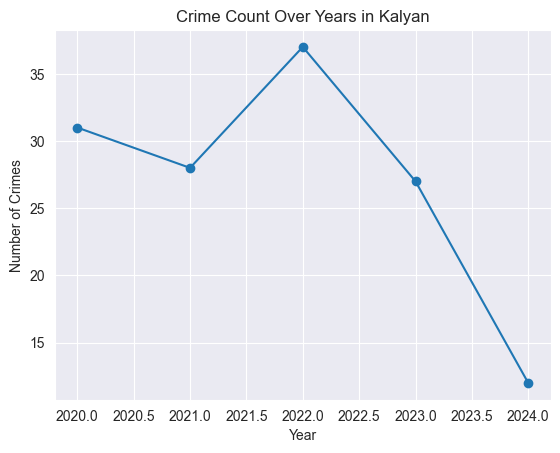



Nashik  : 



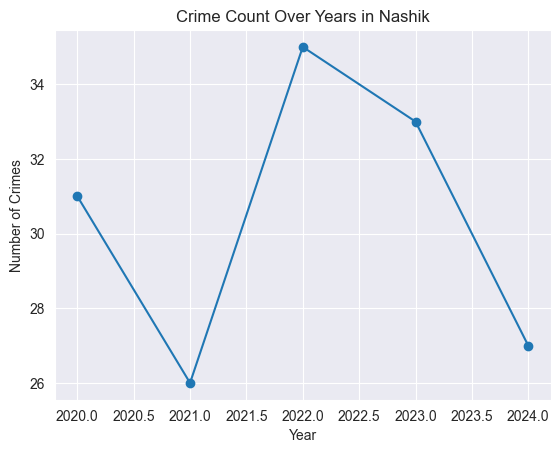



Srinagar  : 



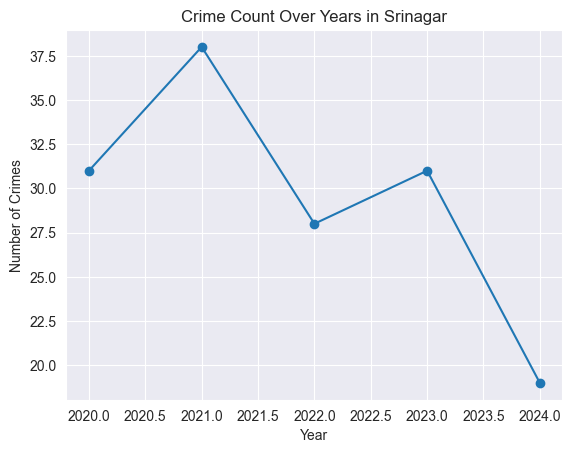



Faridabad  : 



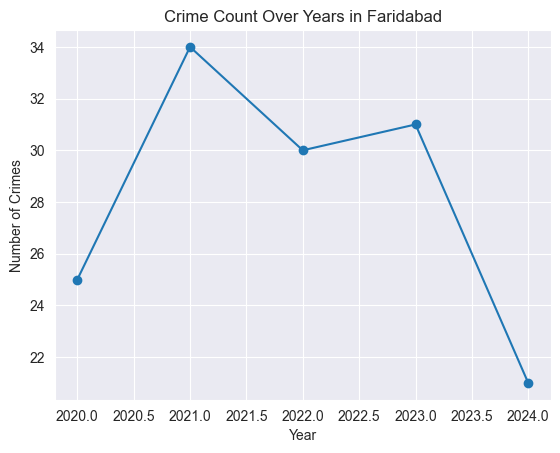

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Convert 'Date Reported' to datetime (if not done already)
dataset['Date Reported'] = pd.to_datetime(dataset['Date Reported'], errors='coerce')

cities = dataset['City'].unique()
years = sorted(dataset['Date Reported'].dt.year.dropna().unique())

for city in cities:
    print(city, " : \n")
    data = dataset[dataset['City'] == city]

    # Group by year and count number of crimes (using 'Crime Code' count as proxy)
    grouped = data.groupby(data['Date Reported'].dt.year)['Crime Code'].count()

    # Align crime counts to all years, fill missing years with 0
    crime_counts = [grouped.get(year, 0) for year in years]

    plt.figure()
    plt.plot(years, crime_counts, marker='o')
    plt.title(f'Crime Count Over Years in {city}')
    plt.xlabel('Year')
    plt.ylabel('Number of Crimes')
    plt.grid(True)
    plt.show()
    print("\n")


In [45]:
from sklearn.tree import DecisionTreeClassifier

# Example: training a decision tree
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train, y_train)


DecisionTreeClassifier()

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import pickle

# Step 1: Create the preprocessor (StandardScaler)
preprocessor = StandardScaler()
preprocessor.fit(X_train)  # Fit scaler on training data

# Step 2: Transform the training data
X_train_scaled = preprocessor.transform(X_train)

# Step 3: Create and train the decision tree
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train_scaled, y_train)  # y_train is your training labels

# Step 4: Save preprocessor and model using pickle
pickle.dump(preprocessor, open('preprocessor.pkl', 'wb'))
pickle.dump(Dtree, open('Dtree.pkl', 'wb'))
